# Decision tree - r2

In [1]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.io import loadmat
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from torch.utils.data import Subset

import torch
import pickle

import sys
sys.path.append('..')
from decision_tree_helper import DecisionTreeHelper
from dataset import BaseDataset, FeatureEngineeredDataset

file_path = "../../data/laser.mat"
mat_dict = loadmat(file_path)

dataset = FeatureEngineeredDataset(mat_dict, "X", "Y", "r2")

Checking path: ../../data_split_indices.pkl
Path exists: True


## 1. Entropy

Entropy: Expected information of a message

In [2]:
entropy = DecisionTreeHelper.calculate_entropy(dataset.labels)
print(f"{entropy = }")

entropy = 1.0


Entropy from 1.0 is expected. 

## 2. Conditional Entropy

Conditional entropy for continious values. 

In [3]:
conditional_entropy = DecisionTreeHelper.calculate_conditional_entropy(dataset.labels, dataset.inputs, threshold=0.7 )
print(f"{conditional_entropy = }")

conditional_entropy = {'inputs_above_threshold': 0.18927843126120164, 'inputs_below_threshold': 0.8142888743456993}


## 3. Information Gain

Information gain for one feature with continious values.

In [4]:
information_gain = DecisionTreeHelper.calculate_continous_information_gain(dataset.labels, dataset.inputs, threshold=0.7)
print(information_gain)

0.40133972851845234


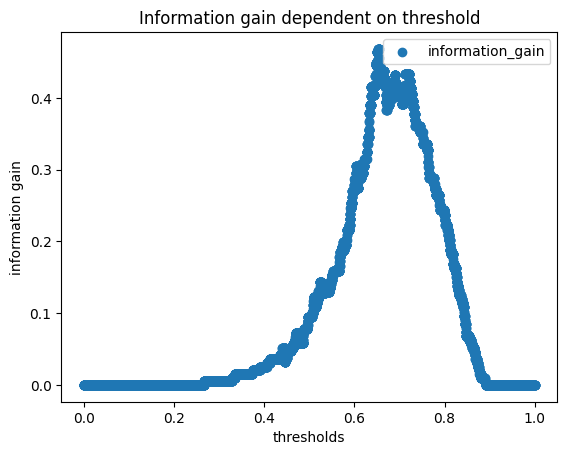

results['best_threshold'] = 0.6533, results['best_information_gain'] = 0.46825365885611736


In [5]:
step_size = 0.0001
thresholds = np.arange(0, 1 + step_size, step_size)

results = DecisionTreeHelper.get_information_gain_values(dataset.labels, dataset.inputs, thresholds)

plt.scatter(thresholds, results['information_gain_values'], label='information_gain')
plt.xlabel('thresholds')
plt.ylabel('information gain')
plt.title('Information gain dependent on threshold')
plt.legend(loc='upper right')
plt.show()


print(f"{results['best_threshold'] = }, {results['best_information_gain'] = }")


**Result:** Best splitting criterium is r2 >= 0.0264. 

Information gain for continious values is used in C4.5.

## 4. Decision tree

### Load train and test data

In [6]:
print(f"train_inputs shape: {dataset.train_inputs.shape}")
print(f"test_inputs shape: {dataset.test_inputs.shape}")
print(f"train_labels shape: {dataset.train_labels.shape}")
print(f"test_labels shape: {dataset.test_labels.shape}")

if dataset.train_inputs.ndim == 1:
    dataset.train_inputs = dataset.train_inputs.reshape(-1, 1)
if dataset.test_inputs.ndim == 1:
    dataset.test_inputs = dataset.test_inputs.reshape(-1, 1)

if dataset.train_labels.ndim != 1:
    dataset.train_labels = dataset.train_labels.ravel()
if dataset.test_labels.ndim != 1:
    dataset.test_labels = dataset.test_labels.ravel()

print(f"train_inputs shape after reshape: {dataset.train_inputs.shape}")
print(f"test_inputs shape after reshape: {dataset.test_inputs.shape}")
print(f"train_labels shape after reshape: {dataset.train_labels.shape}")
print(f"test_labels shape after reshape: {dataset.test_labels.shape}")

train_inputs shape: (160,)
test_inputs shape: (40,)
train_labels shape: (160, 1)
test_labels shape: (40, 1)
train_inputs shape after reshape: (160, 1)
test_inputs shape after reshape: (40, 1)
train_labels shape after reshape: (160,)
test_labels shape after reshape: (40,)


### Train the decision tree

In [7]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=1)
model.fit(dataset.train_inputs, dataset.train_labels)

predictions = model.predict(dataset.test_inputs)

accuracy = np.mean(predictions == dataset.test_labels)
print(f'Accuracy: {accuracy}')

Accuracy: 0.875


# Decision tree - r2, diff


In [8]:
file_path = "../../data/laser.mat"
mat_dict = loadmat(file_path)

dataset = FeatureEngineeredDataset(mat_dict, "X", "Y", "r2+diff")

if dataset.train_inputs.ndim == 1:
    dataset.train_inputs = dataset.train_inputs.reshape(-1, 1)
if dataset.test_inputs.ndim == 1:
    dataset.test_inputs = dataset.test_inputs.reshape(-1, 1)

if dataset.train_labels.ndim != 1:
    dataset.train_labels = dataset.train_labels.ravel()
if dataset.test_labels.ndim != 1:
    dataset.test_labels = dataset.test_labels.ravel()

model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(dataset.train_inputs, dataset.train_labels)

predictions = model.predict(dataset.test_inputs)

accuracy = np.mean(predictions == dataset.test_labels)
print(f'Accuracy: {accuracy}')

Checking path: ../../data_split_indices.pkl
Path exists: True
Accuracy: 0.875
